In [1]:
from google.colab import drive
import os
import json
import numpy as np
from PIL import Image
from tqdm import tqdm

drive.mount('/content/drive')

In [2]:
import os
import json
import cv2
import re
import numpy as np

# Paths to videos and labels
videos_path = "/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/videos"
labels_path = "/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/labels"

# Load target (tissue/organ) mapping from label_mapping.txt
target_mapping = {}
with open(os.path.join('/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/label_mapping.txt'), 'r') as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith('#'):  # skip headers/comments
            continue
        parts = line.split(',')
        triplet_id = int(parts[0])
        target_id = int(parts[3])  # 4th column = target ID
        target_mapping[triplet_id] = target_id

X = []
Y = []

# Loop through all video folders
for vid_folder in sorted(os.listdir(videos_path)):
    vid_path = os.path.join(videos_path, vid_folder)

    if not os.path.isdir(vid_path):
        continue

    # Corresponding label JSON
    label_file = f"{vid_folder}.json"
    label_path = os.path.join(labels_path, label_file)

    if not os.path.exists(label_path):
        print(f"Warning: {label_path} not found, skipping {vid_folder}")
        continue

    # Load JSON labels
    with open(label_path, 'r') as f:
        data = json.load(f)

    annotations = data['annotations']

    # Build frame_number -> target_id list (multiple targets possible per frame)
    frame_target = {}
    for frame_id, triplets in annotations.items():
        frame_number = int(frame_id)
        targets_in_frame = []

        for triplet in triplets:
            triplet_id = triplet[0]  # first element = triplet ID
            target_id = target_mapping.get(triplet_id, -1)  # fallback -1 if missing
            if target_id != -1:
                targets_in_frame.append(target_id)

        # If no triplets, assign "background/none" class = -1
        if len(targets_in_frame) == 0:
            targets_in_frame = [-1]

        frame_target[frame_number] = targets_in_frame

    # Process all frames
    frame_files = sorted([f for f in os.listdir(vid_path) if f.endswith('.png')])
    for frame_file in frame_files:
        match = re.match(r"(\d+)", frame_file)
        if not match:
            continue
        frame_number = int(match.group(1))
        targets = frame_target.get(frame_number, [-1])

        # For simplicity, take the first target if multiple
        target_id = targets[0]

        # Read image
        img_path = os.path.join(vid_path, frame_file)
        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        X.append(img)
        Y.append(target_id)

# Convert to numpy arrays
X = np.array(X, dtype=np.float32) / 255.0
Y = np.array(Y, dtype=np.int64)

print(f"Total frames processed: {len(X)}")
print(f"X shape: {X.shape}, Y shape: {Y.shape}")

In [4]:
data['annotations']

{'13': [[17,
   0,
   1.0,
   0.6469135802469136,
   0.21145374449339208,
   0.056790123456790124,
   0.11013215859030837,
   1,
   0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   0]],
 '38': [[17,
   0,
   1.0,
   0.39012345679012345,
   0.1211453744493392,
   0.09753086419753086,
   0.18061674008810572,
   1,
   0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   0]],
 '61': [[17,
   0,
   1.0,
   0.5814814814814815,
   0.43171806167400884,
   0.10246913580246914,
   0.1277533039647577,
   1,
   0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   0]],
 '87': [[17,
   0,
   1.0,
   0.05185185185185185,
   0.3458149779735683,
   0.3802469135802469,
   0.32158590308370044,
   1,
   0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   0]],
 '94': [[17,
   0,
   1.0,
   0.11728395061728394,
   0.24669603524229075,
   0.32469135802469135,
   0.2488986784140969,
   1,
   0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   0]],
 '114': [[17,
   0,
   1.0,
   0.07407407407407407,
   0.01541850220264

In [13]:
list1 = list(data['annotations'].values())
list1[0]

[[17,
  0,
  1.0,
  0.6469135802469136,
  0.21145374449339208,
  0.056790123456790124,
  0.11013215859030837,
  1,
  0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  0]]

In [16]:
for lis in list1:
  print(lis[0])

[17, 0, 1.0, 0.6469135802469136, 0.21145374449339208, 0.056790123456790124, 0.11013215859030837, 1, 0, 1.0, -1.0, -1.0, -1.0, -1.0, 0]
[17, 0, 1.0, 0.39012345679012345, 0.1211453744493392, 0.09753086419753086, 0.18061674008810572, 1, 0, 1.0, -1.0, -1.0, -1.0, -1.0, 0]
[17, 0, 1.0, 0.5814814814814815, 0.43171806167400884, 0.10246913580246914, 0.1277533039647577, 1, 0, 1.0, -1.0, -1.0, -1.0, -1.0, 0]
[17, 0, 1.0, 0.05185185185185185, 0.3458149779735683, 0.3802469135802469, 0.32158590308370044, 1, 0, 1.0, -1.0, -1.0, -1.0, -1.0, 0]
[17, 0, 1.0, 0.11728395061728394, 0.24669603524229075, 0.32469135802469135, 0.2488986784140969, 1, 0, 1.0, -1.0, -1.0, -1.0, -1.0, 0]
[17, 0, 1.0, 0.07407407407407407, 0.015418502202643172, 0.42345679012345677, 0.36123348017621143, 1, 0, 1.0, -1.0, -1.0, -1.0, -1.0, 0]
[17, 0, 1.0, 0.05432098765432099, 0.1894273127753304, 0.4345679012345679, 0.32599118942731276, 1, 0, 1.0, -1.0, -1.0, -1.0, -1.0, 0]
[60, 2, 1.0, 0.45925925925925926, 0.19162995594713655, 0.09135

In [10]:
unique_values = set()

for key, annotations in data['annotations'].items():
    for entry in annotations:
        if len(entry) > 9:  # safety check
            unique_values.add(entry[9])

print(unique_values)

{1.0}


In [ ]:
set(Y)

{np.int64(-1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(10),
 np.int64(12),
 np.int64(13),
 np.int64(14)}

In [3]:
import json
import os

labels_path = "/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/labels"
example_label_file = os.path.join(labels_path, os.listdir(labels_path)[0])  # take any JSON file

with open(example_label_file, 'r') as f:
    data = json.load(f)

# Extract all target categories
targets = data['categories']['target']
print(f"Number of unique targets: {len(targets)}")

# List them with their IDs (index = ID)
for idx, t in enumerate(targets):
    print(f"ID {idx}: {t}")

Number of unique targets: 15
ID 0: 0
ID 1: 1
ID 2: 2
ID 3: 3
ID 4: 4
ID 5: 5
ID 6: 6
ID 7: 7
ID 8: 8
ID 9: 9
ID 10: 10
ID 11: 11
ID 12: 12
ID 13: 13
ID 14: 14


In [ ]:
data['categories']['target']

{'0': 'gallbladder',
 '1': 'cystic_plate',
 '2': 'cystic_duct',
 '3': 'cystic_artery',
 '4': 'cystic_pedicle',
 '5': 'blood_vessel',
 '6': 'fluid',
 '7': 'abdominal_wall_cavity',
 '8': 'liver',
 '9': 'adhesion',
 '10': 'omentum',
 '11': 'peritoneum',
 '12': 'gut',
 '13': 'specimen_bag',
 '14': 'null_target'}

In [ ]:
from collections import Counter
target_names = list(data['categories']['target'].values())
counts = Counter(Y)
for i in range(15):
    print(f"Target {i} ({target_names[i]}): {counts.get(i,0)} frames")
print(f"Background (-1): {counts.get(-1,0)} frames")

Target 0 (gallbladder): 358 frames
Target 1 (cystic_plate): 55 frames
Target 2 (cystic_duct): 107 frames
Target 3 (cystic_artery): 133 frames
Target 4 (cystic_pedicle): 38 frames
Target 5 (blood_vessel): 41 frames
Target 6 (fluid): 98 frames
Target 7 (abdominal_wall_cavity): 52 frames
Target 8 (liver): 102 frames
Target 9 (adhesion): 0 frames
Target 10 (omentum): 34 frames
Target 11 (peritoneum): 0 frames
Target 12 (gut): 1 frames
Target 13 (specimen_bag): 120 frames
Target 14 (null_target): 70 frames
Background (-1): 109 frames


Correct Data Preprocessing

In [4]:
import os
import json
import cv2
import re
import numpy as np

# Paths to videos and labels
videos_path = "/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/videos"
labels_path = "/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/labels"

# Load all target names from the first JSON (dynamic)
example_json = next(f for f in os.listdir(labels_path) if f.endswith('.json'))
with open(os.path.join(labels_path, example_json), 'r') as f:
    data = json.load(f)
# Build mapping: target_id -> target_name
target_categories = data['categories']['target']
# Correct dynamic target mapping
target_id_to_name = {int(k): v for k, v in data['categories']['target'].items()}
num_targets = len(target_id_to_name)


# Load triplet -> target mapping from label_mapping.txt
target_mapping = {}
with open(os.path.join('/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/label_mapping.txt'), 'r') as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith('#'):
            continue
        parts = line.split(',')
        triplet_id = int(parts[0])
        target_id = int(parts[3])
        target_mapping[triplet_id] = target_id

X = []
Y = []

# Loop through all video folders
for vid_folder in sorted(os.listdir(videos_path)):
    vid_path = os.path.join(videos_path, vid_folder)
    if not os.path.isdir(vid_path):
        continue

    label_file = f"{vid_folder}.json"
    label_path = os.path.join(labels_path, label_file)
    if not os.path.exists(label_path):
        print(f"Warning: {label_path} not found, skipping {vid_folder}")
        continue

    with open(label_path, 'r') as f:
        data = json.load(f)
    annotations = data['annotations']

    # Build frame_number -> list of target IDs
    frame_target = {}
    for frame_id, triplets in annotations.items():
        frame_number = int(frame_id)
        targets_in_frame = []

        for triplet in triplets:
            triplet_id = triplet[0]
            target_id = target_mapping.get(triplet_id, -1)
            if target_id != -1:
                targets_in_frame.append(target_id)

        if len(targets_in_frame) == 0:
            continue  # skip frames with no valid target

        frame_target[frame_number] = targets_in_frame

    # Process frames
    frame_files = sorted([f for f in os.listdir(vid_path) if f.endswith('.png')])
    for frame_file in frame_files:
        match = re.match(r"(\d+)", frame_file)
        if not match:
            continue
        frame_number = int(match.group(1))
        targets = frame_target.get(frame_number)
        if not targets:
            continue

        # Create multi-hot vector
        multi_hot = np.zeros(num_targets, dtype=np.int64)
        for target_id in targets:
            multi_hot[target_id] = 1

        # Read image
        img_path = os.path.join(vid_path, frame_file)
        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        X.append(img)
        Y.append(multi_hot)

# Convert to numpy arrays
X = np.array(X, dtype=np.float32) / 255.0
Y = np.array(Y, dtype=np.int64)

print(f"Total frames processed: {len(X)}")
print(f"X shape: {X.shape}, Y shape: {Y.shape}")
print(f"Example multi-hot target vectors:\n{Y[:10]}")
print(f"Target ID -> Name mapping:\n{target_id_to_name}")

Total frames processed: 1209
X shape: (1209, 224, 224, 3), Y shape: (1209, 15)
Example multi-hot target vectors:
[[1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Target ID -> Name mapping:
{0: 'gallbladder', 1: 'cystic_plate', 2: 'cystic_duct', 3: 'cystic_artery', 4: 'cystic_pedicle', 5: 'blood_vessel', 6: 'fluid', 7: 'abdominal_wall_cavity', 8: 'liver', 9: 'adhesion', 10: 'omentum', 11: 'peritoneum', 12: 'gut', 13: 'specimen_bag', 14: 'null_target'}


In [5]:
np.sum(Y)  # Should give 1318

np.int64(1353)

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assume X and Y are already built and normalized
# First, split off test set (15%)
X_temp, X_test, Y_temp, Y_test = train_test_split(
    X, Y, test_size=0.15, random_state=42, shuffle=True
)

# Then split remaining 85% into train (70%) and val (15%)
val_size = 0.15 / 0.85  # fraction of X_temp to use for validation
X_train, X_val, Y_train, Y_val = train_test_split(
    X_temp, Y_temp, test_size=val_size, random_state=42, shuffle=True
)

# Print shapes to verify
print(f"Train: X={X_train.shape}, Y={Y_train.shape}")
print(f"Validation: X={X_val.shape}, Y={Y_val.shape}")
print(f"Test: X={X_test.shape}, Y={Y_test.shape}")

Train: X=(845, 224, 224, 3), Y=(845, 15)
Validation: X=(182, 224, 224, 3), Y=(182, 15)
Test: X=(182, 224, 224, 3), Y=(182, 15)


Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

# Parameters
input_shape = (224, 224, 3)
num_targets = Y.shape[1]  # 15 in your case
num_heads = 4
ff_dim = 128  # Feed-forward dimension in attention

# Multi-Head Attention Block
def attention_block(inputs):
    # inputs shape: (batch, H*W, C)
    attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attn_output = layers.Add()([inputs, attn_output])
    attn_output = layers.LayerNormalization()(attn_output)

    ff_output = layers.Dense(ff_dim, activation='relu')(attn_output)
    ff_output = layers.Dense(inputs.shape[-1])(ff_output)
    ff_output = layers.Add()([attn_output, ff_output])
    ff_output = layers.LayerNormalization()(ff_output)
    return ff_output

# Input
inputs = layers.Input(shape=input_shape)

# Pretrained backbone
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=inputs)
x = base_model.output  # shape: (batch, 7, 7, 1280)

# Flatten spatial dimensions for attention: (batch, H*W, C)
H, W, C = x.shape[1], x.shape[2], x.shape[3]
x = layers.Reshape((H*W, C))(x)

# Multi-head attention block
x = attention_block(x)

# Global average pooling
x = layers.GlobalAveragePooling1D()(x)

# Dense layers and output
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_targets, activation='sigmoid')(x)  # multi-label

# Model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',  # for multi-label
    metrics=['accuracy']
)

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 30,946,610 (118.05 MB)

 Trainable params: 30,904,587 (117.89 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from sklearn.metrics import hamming_loss, jaccard_score, classification_report

class MultiLabelMetrics(Callback):
    def __init__(self, X_val, Y_val, threshold=0.5):
        super().__init__()
        self.X_val = X_val
        self.Y_val = Y_val
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_val, verbose=0)
        y_pred_bin = (y_pred > self.threshold).astype(int)
        hamming = hamming_loss(self.Y_val, y_pred_bin)
        jaccard = jaccard_score(self.Y_val, y_pred_bin, average='samples')
        print(f" — val Hamming Loss: {hamming:.4f}, val Jaccard Index: {jaccard:.4f}")


callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True),
    MultiLabelMetrics(X_val, Y_val)
]

history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=16,
    epochs=4,
    callbacks=callbacks,
    shuffle=True
)

Epoch 1/4
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1818 - loss: 0.3397 

 — val Hamming Loss: 0.0725, val Jaccard Index: 0.0000
53/53 ━━━━━━━━━━━━━━━━━━━━ 768s 13s/step - accuracy: 0.1830 - loss: 0.3385 - val_accuracy: 0.2857 - val_loss: 0.3074 - learning_rate: 1.0000e-04
Epoch 2/4
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.5069 - loss: 0.1776  — val Hamming Loss: 0.1011, val Jaccard Index: 0.2473
53/53 ━━━━━━━━━━━━━━━━━━━━ 694s 12s/step - accuracy: 0.5077 - loss: 0.1774 - val_accuracy: 0.2857 - val_loss: 0.4443 - learning_rate: 1.0000e-04
Epoch 3/4
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.7648 - loss: 0.1128 

 — val Hamming Loss: 0.1154, val Jaccard Index: 0.1896
53/53 ━━━━━━━━━━━━━━━━━━━━ 706s 13s/step - accuracy: 0.7645 - loss: 0.1128 - val_accuracy: 0.2857 - val_loss: 0.3003 - learning_rate: 1.0000e-04
Epoch 4/4
43/53 ━━━━━━━━━━━━━━━━━━━━ 1:53 11s/step - accuracy: 0.7848 - loss: 0.0809

Different Model

In [ ]:
from tensorflow.keras.applications import MobileNetV2

def attention_block(inputs, num_heads=4, ff_dim=128):
    attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attn_output = layers.Add()([inputs, attn_output])
    attn_output = layers.LayerNormalization()(attn_output)

    ff_output = layers.Dense(ff_dim, activation='relu')(attn_output)
    ff_output = layers.Dense(inputs.shape[-1])(ff_output)
    ff_output = layers.Add()([attn_output, ff_output])
    ff_output = layers.LayerNormalization()(ff_output)
    return ff_output

inputs = layers.Input(shape=(224,224,3))
base_model = MobileNetV2(include_top=False, weights='imagenet', input_tensor=inputs)

x = base_model.output
H, W, C = x.shape[1], x.shape[2], x.shape[3]

# Flatten spatial dims into sequence
x = layers.Reshape((H*W, C))(x)

# Apply attention block
x = attention_block(x, num_heads=4, ff_dim=128)

# Pool features
x = layers.GlobalAveragePooling1D()(x)

# Dense layers
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)

# Multi-label sigmoid output
outputs = layers.Dense(num_targets, activation='sigmoid')(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='binary_crossentropy'
)

model.summary()

/tmp/ipython-input-1421955277.py:15: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights='imagenet', input_tensor=inputs)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 29,155,023 (111.22 MB)

 Trainable params: 29,120,911 (111.09 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from sklearn.metrics import hamming_loss, jaccard_score, classification_report

class MultiLabelMetrics(Callback):
    def __init__(self, X_val, Y_val, threshold=0.5):
        super().__init__()
        self.X_val = X_val
        self.Y_val = Y_val
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_val, verbose=0)
        y_pred_bin = (y_pred > self.threshold).astype(int)
        hamming = hamming_loss(self.Y_val, y_pred_bin)
        jaccard = jaccard_score(self.Y_val, y_pred_bin, average='samples')
        print(f" — val Hamming Loss: {hamming:.4f}, val Jaccard Index: {jaccard:.4f}")

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
    ModelCheckpoint('best_mobilenet_model.h5', monitor='val_loss', save_best_only=True),
    MultiLabelMetrics(X_val, Y_val)
]

history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=16,  # you can try 32 since MobileNet is lighter
    epochs=4,
    callbacks=callbacks,
    shuffle=True
)

Epoch 1/4
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.3063 

 — val Hamming Loss: 0.0725, val Jaccard Index: 0.0082
53/53 ━━━━━━━━━━━━━━━━━━━━ 640s 11s/step - loss: 0.3052 - val_loss: 0.2161 - learning_rate: 1.0000e-04
Epoch 2/4
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.1482 

 — val Hamming Loss: 0.0703, val Jaccard Index: 0.1126
53/53 ━━━━━━━━━━━━━━━━━━━━ 626s 12s/step - loss: 0.1481 - val_loss: 0.1991 - learning_rate: 1.0000e-04
Epoch 3/4
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0865 — val Hamming Loss: 0.0718, val Jaccard Index: 0.0714
53/53 ━━━━━━━━━━━━━━━━━━━━ 568s 11s/step - loss: 0.0864 - val_loss: 0.2297 - learning_rate: 1.0000e-04
Epoch 4/4
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 0.0485  — val Hamming Loss: 0.0791, val Jaccard Index: 0.2601
53/53 ━━━━━━━━━━━━━━━━━━━━ 601s 11s/step - loss: 0.0486 - val_loss: 0.2469 - learning_rate: 1.0000e-04


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from sklearn.metrics import hamming_loss, jaccard_score, classification_report

class MultiLabelMetrics(Callback):
    def __init__(self, X_val, Y_val, threshold=0.5):
        super().__init__()
        self.X_val = X_val
        self.Y_val = Y_val
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_val, verbose=0)
        y_pred_bin = (y_pred > self.threshold).astype(int)
        hamming = hamming_loss(self.Y_val, y_pred_bin)
        jaccard = jaccard_score(self.Y_val, y_pred_bin, average='samples')
        print(f" — val Hamming Loss: {hamming:.4f}, val Jaccard Index: {jaccard:.4f}")

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
    ModelCheckpoint('best_mobilenet_model.h5', monitor='val_loss', save_best_only=True),
    MultiLabelMetrics(X_val, Y_val)
]

history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=32,
    epochs=4,
    callbacks=callbacks,
    shuffle=True
)

Epoch 1/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - loss: 0.3596 

 — val Hamming Loss: 0.0725, val Jaccard Index: 0.0000
27/27 ━━━━━━━━━━━━━━━━━━━━ 571s 20s/step - loss: 0.3567 - val_loss: 0.2201 - learning_rate: 1.0000e-04
Epoch 2/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - loss: 0.1766 

 — val Hamming Loss: 0.0722, val Jaccard Index: 0.0275
27/27 ━━━━━━━━━━━━━━━━━━━━ 527s 20s/step - loss: 0.1763 - val_loss: 0.2106 - learning_rate: 1.0000e-04
Epoch 3/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - loss: 0.1255 

 — val Hamming Loss: 0.0696, val Jaccard Index: 0.0549
27/27 ━━━━━━━━━━━━━━━━━━━━ 541s 20s/step - loss: 0.1252 - val_loss: 0.1918 - learning_rate: 1.0000e-04
Epoch 4/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - loss: 0.0741  — val Hamming Loss: 0.0685, val Jaccard Index: 0.0989
27/27 ━━━━━━━━━━━━━━━━━━━━ 534s 20s/step - loss: 0.0740 - val_loss: 0.2086 - learning_rate: 1.0000e-04


In [ ]:
y_test_pred = model.predict(X_test)
y_test_bin = (y_test_pred > 0.5).astype(int)

hamming = hamming_loss(Y_test, y_test_bin)
jaccard = jaccard_score(Y_test, y_test_bin, average='samples')

print(f"Test Hamming Loss: {hamming:.4f}, Test Jaccard Index: {jaccard:.4f}")
print("Per-label classification report:")
print(classification_report(Y_test, y_test_bin, target_names=[target_id_to_name[i] for i in range(num_targets)]))

6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step
Test Hamming Loss: 0.0744, Test Jaccard Index: 0.0385
Per-label classification report:
                       precision    recall  f1-score   support

          gallbladder       0.44      0.09      0.15        44
         cystic_plate       0.00      0.00      0.00         8
          cystic_duct       1.00      0.05      0.09        22
        cystic_artery       0.50      0.04      0.08        23
       cystic_pedicle       0.00      0.00      0.00         6
         blood_vessel       0.00      0.00      0.00         9
                fluid       0.00      0.00      0.00        20
abdominal_wall_cavity       0.00      0.00      0.00        14
                liver       0.00      0.00      0.00        18
             adhesion       0.00      0.00      0.00         0
              omentum       0.00      0.00      0.00         6
           peritoneum       0.00      0.00      0.00         0
                  gut       0.00      0.00      0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

Different Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications, optimizers

# LCAM + Multi-Head Attention
class LCAM_MHA(layers.Layer):
    def __init__(self, reduction=16, num_heads=4, **kwargs):
        super(LCAM_MHA, self).__init__(**kwargs)
        self.reduction = reduction
        self.num_heads = num_heads

    def build(self, input_shape):
        channel_dim = input_shape[-1]
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.fc1 = layers.Dense(channel_dim // self.reduction, activation='relu')
        self.fc2 = layers.Dense(channel_dim, activation='sigmoid')
        self.mha = layers.MultiHeadAttention(num_heads=self.num_heads,
                                             key_dim=channel_dim // self.num_heads)
        super(LCAM_MHA, self).build(input_shape)

    def call(self, inputs):
        # --- Channel attention (LCAM) ---
        x = self.global_avg_pool(inputs)
        x = self.fc1(x)
        x = self.fc2(x)
        x = tf.expand_dims(tf.expand_dims(x, 1), 1)  # reshape for broadcasting
        channel_refined = inputs * x

        # --- Multi-head self-attention ---
        # flatten spatial dims -> (batch, H*W, C)
        B, H, W, C = tf.shape(inputs)[0], tf.shape(inputs)[1], tf.shape(inputs)[2], tf.shape(inputs)[3]
        reshaped = tf.reshape(channel_refined, (B, H*W, C))
        attn_out = self.mha(reshaped, reshaped)
        attn_out = tf.reshape(attn_out, (B, H, W, C))

        # Combine both
        return channel_refined + attn_out

# Model builder with MobileNetV2 + LCAM+MHA
def build_mobilenet_lcam_mha(input_shape=(224, 224, 3), num_classes=15):
    base_model = applications.MobileNetV2(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # freeze backbone

    inputs = layers.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = LCAM_MHA()(x)  # <-- Enhanced Attention Block
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation="sigmoid")(x)

    model = models.Model(inputs, outputs)
    return model

# Build + compile
model = build_mobilenet_lcam_mha(input_shape=(224,224,3), num_classes=Y_train.shape[1])
model.compile(
    optimizer=optimizers.Adam(1e-4),
    loss="binary_crossentropy"
)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lcam_mha (LCAM_MHA)             │ (None, 7, 7, 1280)     │     6,764,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 15)             │        19,215 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,042,079 (34.49 MB)

 Trainable params: 6,784,095 (25.88 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers


# --- Custom Metrics ---
def hamming_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    mismatches = tf.not_equal(y_true, y_pred)          # bool tensor
    return tf.reduce_mean(tf.cast(mismatches, tf.float32))  # cast to float

def jaccard_index(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred, axis=1)
    union = tf.reduce_sum(y_true + y_pred, axis=1) - intersection
    return tf.reduce_mean((intersection + smooth) / (union + smooth))

def exact_match_accuracy(y_true, y_pred):
    """Plain accuracy = exact labelset match per sample"""
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    match = tf.reduce_all(tf.equal(y_true, y_pred), axis=1)   # bool tensor
    return tf.reduce_mean(tf.cast(match, tf.float32))         # cast to float


model = build_mobilenet_lcam_mha(input_shape=(224,224,3), num_classes=Y_train.shape[1])

model.compile(
    optimizer=optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=[exact_match_accuracy, hamming_loss, jaccard_index]
)

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=4,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint("mobilenet_lcam_mha.keras", save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, verbose=1)
    ]
)

Epoch 1/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - exact_match_accuracy: 0.0214 - hamming_loss: 0.1532 - jaccard_index: 0.0512 - loss: 0.3967 - val_exact_match_accuracy: 0.0000e+00 - val_hamming_loss: 0.0727 - val_jaccard_index: 9.5454e-07 - val_loss: 0.2177 - learning_rate: 1.0000e-04
Epoch 2/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - exact_match_accuracy: 0.0314 - hamming_loss: 0.0755 - jaccard_index: 0.0411 - loss: 0.2177 - val_exact_match_accuracy: 0.1501 - val_hamming_loss: 0.0775 - val_jaccard_index: 0.1909 - val_loss: 0.1980 - learning_rate: 1.0000e-04
Epoch 3/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - exact_match_accuracy: 0.1757 - hamming_loss: 0.0676 - jaccard_index: 0.2112 - loss: 0.1818 - val_exact_match_accuracy: 0.1998 - val_hamming_loss: 0.0656 - val_jaccard_index: 0.2232 - val_loss: 0.1675 - learning_rate: 1.0000e-04
Epoch 4/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - exact_match_accuracy: 0.2922 - hamming_loss: 0.0585 - jaccard_index: 0.3380 - loss: 0.1488 - val_exa

Trying a Different Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# --- Custom Metrics ---
def hamming_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    mismatches = tf.not_equal(y_true, y_pred)
    return tf.reduce_mean(tf.cast(mismatches, tf.float32))

def jaccard_index(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred, axis=1)
    union = tf.reduce_sum(y_true + y_pred, axis=1) - intersection
    return tf.reduce_mean((intersection + smooth) / (union + smooth))

def exact_match_accuracy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    match = tf.reduce_all(tf.equal(y_true, y_pred), axis=1)
    return tf.reduce_mean(tf.cast(match, tf.float32))

def build_cnn_transformer_model(input_shape=(224,224,3), num_classes=15, num_heads=4, ff_dim=256):

    # CNN Backbone (MobileNetV2)
    base_model = MobileNetV2(include_top=False, input_shape=input_shape, weights="imagenet")
    base_model.trainable = False  # freeze backbone

    inputs = layers.Input(shape=input_shape)
    x = base_model(inputs, training=False)   # shape: (7,7,1280)
    x = layers.Conv2D(512, (1,1), activation="relu")(x)
    x = layers.Reshape((-1, 512))(x)   # reshape to (tokens, features)

    # Transformer Encoder Block
    attn_out = layers.MultiHeadAttention(num_heads=num_heads, key_dim=64)(x, x)
    attn_out = layers.LayerNormalization()(x + attn_out)

    ffn = models.Sequential([
        layers.Dense(ff_dim, activation="relu"),
        layers.Dense(512),
    ])
    x = layers.LayerNormalization()(attn_out + ffn(attn_out))

    # Classification Head
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation="sigmoid")(x)

    model = models.Model(inputs, outputs)
    return model

# --- Build and Compile ---
num_classes = 15
model = build_cnn_transformer_model(input_shape=(224,224,3), num_classes=num_classes)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=[exact_match_accuracy, hamming_loss, jaccard_index]
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mobilenetv2_1.00_2… │ (None, 7, 7,      │  2,257,984 │ input_layer_5[0]… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 7, 7, 512) │    655,872 │ mobilenetv2_1.00… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 49, 512)   │          0 │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 49, 512)   │    525,568 │ reshape_2[0][0],  │
│ (MultiHeadAttentio… │                   │            │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 49, 512)   │          0 │ reshape_2[0][0],  │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 512)   │      1,024 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 49, 512)   │    262,912 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 49, 512)   │          0 │ layer_normalizat… │
│                     │                   │            │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 512)   │      1,024 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 512)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 15)        │      7,695 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,712,079 (14.16 MB)

 Trainable params: 1,454,095 (5.55 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# --- Training ---
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=4,          # you can increase this later
    batch_size=32
)

Epoch 1/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - exact_match_accuracy: 0.0207 - hamming_loss: 0.1716 - jaccard_index: 0.0493 - loss: 0.3992 - val_exact_match_accuracy: 0.0000e+00 - val_hamming_loss: 0.0731 - val_jaccard_index: 9.5194e-07 - val_loss: 0.2175
Epoch 2/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - exact_match_accuracy: 0.0767 - hamming_loss: 0.0772 - jaccard_index: 0.0908 - loss: 0.2238 - val_exact_match_accuracy: 0.0672 - val_hamming_loss: 0.0737 - val_jaccard_index: 0.0855 - val_loss: 0.1933
Epoch 3/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - exact_match_accuracy: 0.1125 - hamming_loss: 0.0716 - jaccard_index: 0.1305 - loss: 0.1948 - val_exact_match_accuracy: 0.1141 - val_hamming_loss: 0.0648 - val_jaccard_index: 0.1167 - val_loss: 0.1772
Epoch 4/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - exact_match_accuracy: 0.1979 - hamming_loss: 0.0638 - jaccard_index: 0.2295 - loss: 0.1786 - val_exact_match_accuracy: 0.2074 - val_hamming_loss: 0.0647 - val_jaccard_index: 0.2378 - val_l

In [ ]:
# --- Evaluation on Test ---
results = model.evaluate(X_test, Y_test, verbose=1)
print("\nTest Results:")
for name, val in zip(model.metrics_names, results):
    print(f"{name}: {val:.4f}")

Different Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# --- Custom metrics (same as before) ---
def exact_match_accuracy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.int32)
    y_pred = tf.cast(y_pred > 0.5, tf.int32)
    match = tf.reduce_all(tf.equal(y_true, y_pred), axis=1)
    return tf.reduce_mean(tf.cast(match, tf.float32))

def hamming_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    return tf.reduce_mean(tf.not_equal(y_true, y_pred))

def jaccard_index(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred, axis=1)
    union = tf.reduce_sum(y_true + y_pred, axis=1) - intersection
    return tf.reduce_mean((intersection + smooth) / (union + smooth))


# --- Query2Label-like model ---
def build_query2label_model(input_shape=(224,224,3), num_labels=15, embed_dim=256, num_heads=4, ff_dim=256, num_decoder_layers=2):
    inputs = layers.Input(shape=input_shape)

    # Backbone (feature extractor)
    backbone = MobileNetV2(include_top=False, input_shape=input_shape, weights='imagenet')
    backbone.trainable = False
    feat = backbone(inputs)  # shape (B,H,W,C)

    H, W, C = feat.shape[1], feat.shape[2], feat.shape[3]
    feat_flat = layers.Reshape((H*W, C))(feat)   # (B, HW, C)
    feat_proj = layers.Dense(embed_dim)(feat_flat)  # (B, HW, embed_dim)

    # Label queries as embeddings (learnable)
    label_queries = tf.Variable(
        initial_value=tf.random.normal([num_labels, embed_dim]),
        trainable=True,
        name="label_queries"
    )

    # Wrap label queries into a layer so they broadcast per batch
    def broadcast_queries(batch_size):
        return tf.tile(tf.expand_dims(label_queries, axis=0), [batch_size, 1, 1])

    # Lambda layer for batch queries
    batch_queries = layers.Lambda(lambda x: broadcast_queries(tf.shape(x)[0]))(feat_proj)

    x = batch_queries
    for _ in range(num_decoder_layers):
        attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x, feat_proj)
        attn = layers.Add()([x, attn])
        attn = layers.LayerNormalization()(attn)

        ff = layers.Dense(ff_dim, activation='relu')(attn)
        ff = layers.Dense(embed_dim)(ff)
        x = layers.Add()([attn, ff])
        x = layers.LayerNormalization()(x)

    outputs = layers.Dense(1, activation="sigmoid")(x)  # per label
    outputs = layers.Reshape((num_labels,))(outputs)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model


# --- Build & compile ---
num_classes = Y_train.shape[1]  # assuming multilabel
model = build_query2label_model(input_shape=(224,224,3), num_labels=num_classes)

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=[exact_match_accuracy, hamming_loss, jaccard_index]
)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mobilenetv2_1.00_2… │ (None, 7, 7,      │  2,257,984 │ input_layer_9[0]… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_4 (Reshape) │ (None, 49, 1280)  │          0 │ mobilenetv2_1.00… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 49, 256)   │    327,936 │ reshape_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 15, 256)   │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 15, 256)   │  1,051,904 │ lambda[0][0],     │
│ (MultiHeadAttentio… │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 15, 256)   │          0 │ lambda[0][0],     │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 15, 256)   │        512 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 15, 256)   │     65,792 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 15, 256)   │     65,792 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 15, 256)   │          0 │ layer_normalizat… │
│                     │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 15, 256)   │        512 │ add_5[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 15, 256)   │  1,051,904 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 15, 256)   │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 15, 256)   │        512 │ add_6[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 15, 256)   │     65,792 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 15, 256)   │     65,792 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 15, 256)   │          0 │ layer_normalizat… │
│                     │                   │            │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 15, 256)   │        512 │ add_7[0][0]       │
│ (LayerNormalizatio… │                   │            │                 

 Total params: 4,955,201 (18.90 MB)

 Trainable params: 2,697,217 (10.29 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

def hamming_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    mismatches = tf.cast(tf.not_equal(y_true, y_pred), tf.float32)  # ✅ cast to float
    return tf.reduce_mean(mismatches)

def jaccard_index(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred, axis=1)
    union = tf.reduce_sum(y_true + y_pred, axis=1) - intersection
    return tf.reduce_mean((intersection + smooth) / (union + smooth))

def exact_match_accuracy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    matches = tf.reduce_all(tf.equal(y_true, y_pred), axis=1)
    return tf.reduce_mean(tf.cast(matches, tf.float32))  # ✅ cast here too


# --- Callbacks ---
checkpoint = ModelCheckpoint("query2label_best.keras",
                             monitor="val_loss",
                             save_best_only=True,
                             verbose=1)

reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                              factor=0.5,
                              patience=3,
                              verbose=1)

early_stop = EarlyStopping(monitor="val_loss",
                           patience=6,
                           restore_best_weights=True,
                           verbose=1)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=[exact_match_accuracy, hamming_loss, jaccard_index]
)

history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=4,
    batch_size=32
)

Epoch 1/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - exact_match_accuracy: 0.0296 - hamming_loss: 0.1350 - jaccard_index: 0.0480 - loss: 0.3639 - val_exact_match_accuracy: 0.0000e+00 - val_hamming_loss: 0.0724 - val_jaccard_index: 9.5715e-07 - val_loss: 0.2277
Epoch 2/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - exact_match_accuracy: 0.0000e+00 - hamming_loss: 0.0755 - jaccard_index: 9.3411e-07 - loss: 0.2271 - val_exact_match_accuracy: 0.0000e+00 - val_hamming_loss: 0.0720 - val_jaccard_index: 0.0026 - val_loss: 0.2129
Epoch 3/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - exact_match_accuracy: 0.0025 - hamming_loss: 0.0749 - jaccard_index: 0.0059 - loss: 0.2118 - val_exact_match_accuracy: 0.0104 - val_hamming_loss: 0.0720 - val_jaccard_index: 0.0156 - val_loss: 0.1952
Epoch 4/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - exact_match_accuracy: 0.0624 - hamming_loss: 0.0701 - jaccard_index: 0.0776 - loss: 0.1872 - val_exact_match_accuracy: 0.1141 - val_hamming_loss: 0.0655 - val_jaccard_index: 0.

Further Exploring

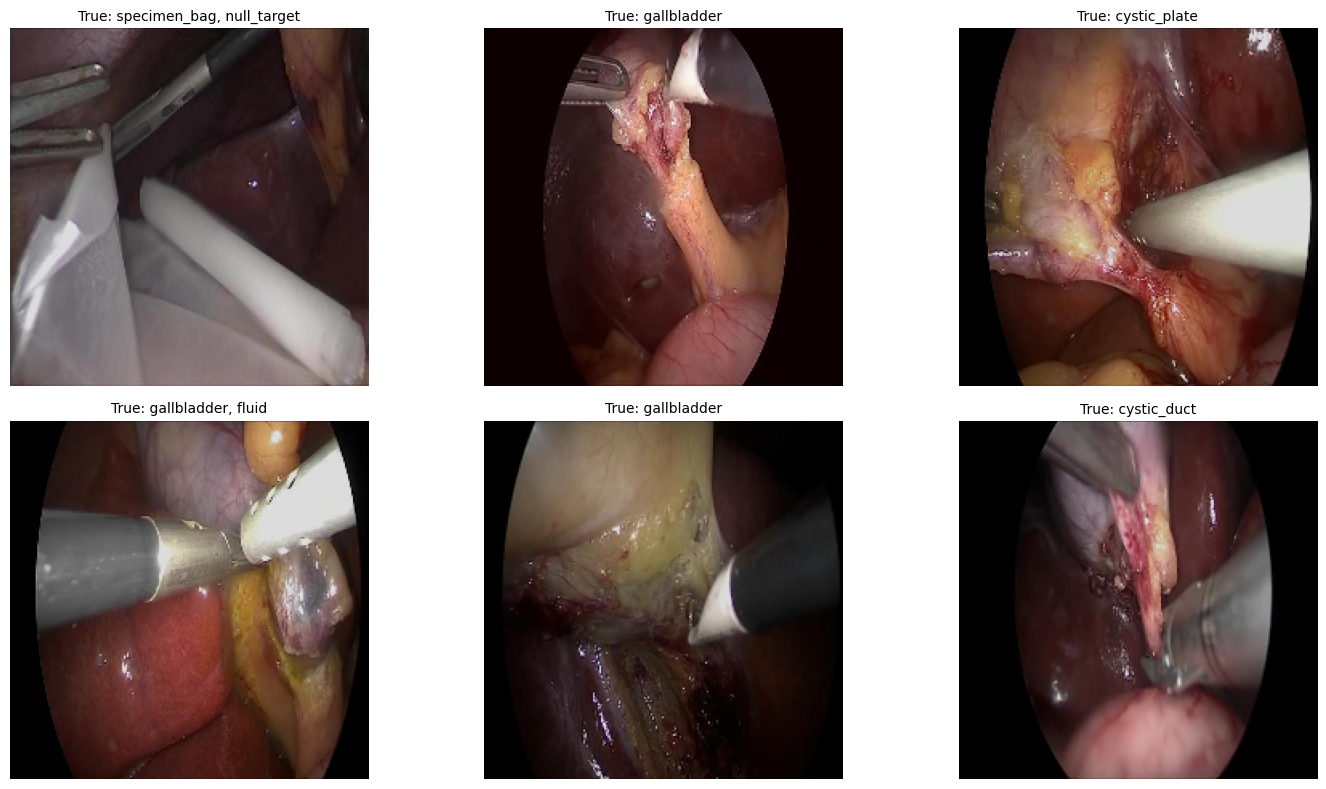

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = 6
plt.figure(figsize=(15, 8))

for i in range(n):
    idx = np.random.randint(0, len(X_train))
    img = X_train[idx]

    # Get the true labels
    true_labels_idx = np.where(Y_train[idx] == 1)[0]
    true_labels_names = [target_id_to_name[t] for t in true_labels_idx]  # map indices to names

    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {', '.join(true_labels_names)}", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_lightweight_cnn(input_shape=(224, 224, 3), num_classes=15):
    model = models.Sequential()

    # --- Convolutional Block 1 ---
    model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.2))

    # --- Convolutional Block 2 ---
    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.2))

    # --- Convolutional Block 3 ---
    model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.3))

    # --- Convolutional Block 4 ---
    model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.3))

    # --- Global Pooling + Dense ---
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(num_classes, activation='sigmoid'))  # multi-label output

    return model

In [ ]:
model = build_lightweight_cnn(input_shape=(224, 224, 3), num_classes=15)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',  # multi-label
    metrics=['accuracy']         # plain accuracy, can add custom metrics later
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,615 (2.02 MB)

 Trainable params: 528,655 (2.02 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=10,
    batch_size=32,
    shuffle=True
)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 208s 7s/step - accuracy: 0.1050 - loss: 0.5178 - val_accuracy: 0.1264 - val_loss: 0.6830
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 261s 7s/step - accuracy: 0.2362 - loss: 0.2615 - val_accuracy: 0.1264 - val_loss: 0.6420
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 264s 8s/step - accuracy: 0.2885 - loss: 0.2375 - val_accuracy: 0.0714 - val_loss: 0.5886
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 205s 8s/step - accuracy: 0.2983 - loss: 0.2228 - val_accuracy: 0.3187 - val_loss: 0.5377
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 211s 8s/step - accuracy: 0.3149 - loss: 0.2208 - val_accuracy: 0.3077 - val_loss: 0.4701
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 200s 7s/step - accuracy: 0.3341 - loss: 0.2158 - val_accuracy: 0.2857 - val_loss: 0.4057
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 204s 8s/step - accuracy: 0.3183 - loss: 0.2137 - val_accuracy: 0.2857 - val_loss: 0.3779
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 202s 8s/step - accuracy: 0.3792 - loss: 0.2050 - val_accuracy: 0.2857 - v

Different Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_small_multilabel(input_shape=(224,224,3), num_labels=15):
    base = tf.keras.applications.DenseNet121(
        include_top=False,
        input_shape=input_shape,
        weights="imagenet"
    )
    base.trainable = False  # fine-tune later

    inputs = layers.Input(shape=input_shape)
    x = base(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_labels, activation="sigmoid")(x)

    model = models.Model(inputs, outputs)
    return model

model = build_small_multilabel()
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC(multi_label=True)]
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

# --- Exact Match Accuracy (strict) ---
def exact_match_accuracy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)   # FIX
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    return tf.reduce_mean(
        tf.cast(tf.reduce_all(tf.equal(y_true, y_pred), axis=1), tf.float32)
    )

# --- Hamming Loss ---
def hamming_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)   # FIX
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    return tf.reduce_mean(tf.cast(tf.not_equal(y_true, y_pred), tf.float32))

# --- Jaccard Index (IoU) ---
def jaccard_index(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, tf.float32)   # FIX
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred, axis=1)
    union = tf.reduce_sum(y_true + y_pred, axis=1) - intersection
    return tf.reduce_mean((intersection + smooth) / (union + smooth))

# --- Precision, Recall, F1 ---
def precision_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)   # FIX
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    pp = K.sum(K.round(K.clip(y_pred, 0, 1)))
    return tp / (pp + K.epsilon())

def recall_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)   # FIX
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    posp = K.sum(K.round(K.clip(y_true, 0, 1)))
    return tp / (posp + K.epsilon())

def f1_m(y_true, y_pred):
    p = precision_m(y_true, y_pred)
    r = recall_m(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="binary_accuracy"),  # per-label accuracy
        exact_match_accuracy,
        hamming_loss,
        jaccard_index,
        precision_m,
        recall_m,
        f1_m,
        tf.keras.metrics.AUC(multi_label=True, name="auc")  # ROC-AUC for multilabel
    ]
)

history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=4,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.3)
    ]
)

Epoch 1/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 218s 7s/step - auc: 0.4284 - binary_accuracy: 0.5404 - exact_match_accuracy: 0.0000e+00 - f1_m: 0.1060 - hamming_loss: 0.4595 - jaccard_index: 0.0593 - loss: 0.9551 - precision_m: 0.0624 - recall_m: 0.3563 - val_auc: 0.3922 - val_binary_accuracy: 0.7484 - val_exact_match_accuracy: 0.0000e+00 - val_f1_m: 0.0618 - val_hamming_loss: 0.2510 - val_jaccard_index: 0.0350 - val_loss: 0.5347 - val_precision_m: 0.0422 - val_recall_m: 0.1159 - learning_rate: 1.0000e-04
Epoch 2/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 184s 7s/step - auc: 0.3916 - binary_accuracy: 0.7072 - exact_match_accuracy: 0.0016 - f1_m: 0.1018 - hamming_loss: 0.2927 - jaccard_index: 0.0608 - loss: 0.6245 - precision_m: 0.0664 - recall_m: 0.2234 - val_auc: 0.3989 - val_binary_accuracy: 0.8626 - val_exact_match_accuracy: 0.0156 - val_f1_m: 0.0485 - val_hamming_loss: 0.1359 - val_jaccard_index: 0.0313 - val_loss: 0.3614 - val_precision_m: 0.0512 - val_recall_m: 0.0462 - learning_rate: 1.0000e-04
Epoch 3/

Advanced Preprocessing

In [6]:
import numpy as np

# Y_train is assumed to be a numpy array of shape (num_frames, num_classes)
class_sums = np.sum(Y, axis=0)
for i, s in enumerate(class_sums):
    print(f"Class {i}: {s} positive samples")

Class 0: 360 positive samples
Class 1: 56 positive samples
Class 2: 143 positive samples
Class 3: 140 positive samples
Class 4: 42 positive samples
Class 5: 41 positive samples
Class 6: 120 positive samples
Class 7: 56 positive samples
Class 8: 124 positive samples
Class 9: 0 positive samples
Class 10: 36 positive samples
Class 11: 0 positive samples
Class 12: 3 positive samples
Class 13: 132 positive samples
Class 14: 100 positive samples


In [6]:
import numpy as np

# Y is your multi-hot label array of shape (num_samples, num_classes)
class_counts = np.sum(Y, axis=0)  # sum over samples for each class
valid_classes = np.where(class_counts > 0)[0]

print("Classes with at least one frame:", valid_classes)
print("Number of valid classes:", len(valid_classes))

Classes with at least one frame: [ 0  1  2  3  4  5  6  7  8 10 12 13 14]
Number of valid classes: 13


In [7]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# --- Function to augment a single frame ---
def augment_frame(img):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_flip_up_down(img)
    k = tf.random.uniform([], minval=0, maxval=4, dtype=tf.int32)
    img = tf.image.rot90(img, k)
    img = tf.image.random_brightness(img, max_delta=0.1)
    img = tf.image.random_contrast(img, lower=0.9, upper=1.1)
    return img

# --- Identify classes with at least 1 positive ---
class_counts = np.sum(Y, axis=0)
valid_classes = np.where(class_counts > 0)[0]

# --- Target samples per class ---
target_samples = 200

aug_X = []
aug_Y = []

for cls in valid_classes:
    current_count = np.sum(Y[:, cls])
    if current_count >= target_samples:
        continue  # skip majority classes
    needed = target_samples - current_count
    idx = np.where(Y[:, cls] == 1)[0]
    if len(idx) == 0:
        continue  # skip if no samples
    np.random.shuffle(idx)
    for i in range(needed):
        img = X[idx[i % len(idx)]]  # loop over available frames
        label = Y[idx[i % len(idx)]]
        aug_img = augment_frame(img)
        aug_X.append(aug_img.numpy())
        aug_Y.append(label)

# Combine augmented data with original
X_balanced = np.concatenate([X, np.array(aug_X)], axis=0)
Y_balanced = np.concatenate([Y, np.array(aug_Y)], axis=0)

print("Original dataset size:", len(X))
print("Balanced dataset size:", len(X_balanced))

# --- Split into train/val/test ---
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X_balanced, Y_balanced, test_size=0.3, random_state=42, shuffle=True
)
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42, shuffle=True
)

print("Train size:", len(X_train))
print("Val size:", len(X_val))
print("Test size:", len(X_test))

Original dataset size: 1209
Balanced dataset size: 2616
Train size: 1831
Val size: 392
Test size: 393


In [8]:
import numpy as np

# Y_train is assumed to be a numpy array of shape (num_frames, num_classes)
class_sums = np.sum(Y_balanced, axis=0)
for i, s in enumerate(class_sums):
    print(f"Class {i}: {s} positive samples")

Class 0: 587 positive samples
Class 1: 200 positive samples
Class 2: 200 positive samples
Class 3: 200 positive samples
Class 4: 200 positive samples
Class 5: 200 positive samples
Class 6: 201 positive samples
Class 7: 201 positive samples
Class 8: 221 positive samples
Class 9: 0 positive samples
Class 10: 201 positive samples
Class 11: 0 positive samples
Class 12: 200 positive samples
Class 13: 211 positive samples
Class 14: 211 positive samples


In [ ]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras import layers, models

# Build MobileNet multi-label model
def build_multilabel_model_mobilenet(input_shape, num_classes):
    base_model = MobileNetV3Small(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # freeze the backbone

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='sigmoid')  # multi-label output
    ])


    return model

input_shape = (224, 224, 3)
num_classes = Y_balanced.shape[1]  # adjust based on your labels
model = build_multilabel_model_mobilenet(input_shape, num_classes)
model.summary()

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,242,239 (4.74 MB)

 Trainable params: 303,119 (1.16 MB)

 Non-trainable params: 939,120 (3.58 MB)

In [ ]:
import tensorflow as tf

# Compute class frequencies from the balanced dataset
class_counts = np.sum(Y_balanced, axis=0)
total_counts = np.sum(class_counts)
class_weights = total_counts / (len(class_counts))

# Convert class_weights to tensor
class_weights_tf = tf.convert_to_tensor(class_weights, dtype=tf.float32)

def class_balanced_focal_loss(gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1-1e-7)
        ce = - (y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
        ce *= class_weights_tf  # use TF tensor
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        focal = ce * tf.pow(1 - pt, gamma)
        return tf.reduce_mean(focal)
    return loss

# Wrap Hamming and Jaccard metrics using tf.keras.metrics.Metric
class HammingLoss(tf.keras.metrics.Metric):
    def __init__(self, name="hamming_loss", **kwargs):
        super().__init__(name=name, **kwargs)
        self.total = self.add_weight(name="total", initializer="zeros")
        self.count = self.add_weight(name="count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_bin = tf.cast(y_pred > 0.5, tf.float32)
        mismatches = tf.reduce_sum(tf.cast(tf.not_equal(y_true, y_pred_bin), tf.float32))
        self.total.assign_add(mismatches)
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def reset_states(self):
        self.total.assign(0.0)
        self.count.assign(0.0)

class JaccardIndex(tf.keras.metrics.Metric):
    def __init__(self, name="jaccard_index", smooth=1e-6, **kwargs):
        super().__init__(name=name, **kwargs)
        self.smooth = smooth
        self.total = self.add_weight(name="total", initializer="zeros")
        self.count = self.add_weight(name="count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_bin = tf.cast(y_pred > 0.5, tf.float32)
        intersection = tf.reduce_sum(y_true * y_pred_bin, axis=1)
        union = tf.reduce_sum(y_true + y_pred_bin, axis=1) - intersection
        self.total.assign_add(tf.reduce_sum((intersection + self.smooth)/(union + self.smooth)))
        self.count.assign_add(tf.cast(tf.shape(y_true)[0], tf.float32))
    def result(self):
        return self.total / self.count
    def reset_states(self):
        self.total.assign(0.0)
        self.count.assign(0.0)

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=class_balanced_focal_loss(gamma=2.0),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="binary_accuracy"),
        tf.keras.metrics.AUC(curve='ROC', multi_label=True, num_labels=num_classes, name="auc"),
        HammingLoss(),
        JaccardIndex()
    ]
)

In [ ]:
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
X_val = X_val.astype('float32')
Y_val = Y_val.astype('float32')

In [ ]:
import tensorflow as tf

# --- Callbacks ---
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# Optional: TensorBoard for logging
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)

In [ ]:
import tensorflow as tf

AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 8  # lower to save memory

# --- Data pipeline ---
def preprocess(X, Y, training=True):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    if training:
        dataset = dataset.shuffle(1000)
        dataset = dataset.map(lambda x, y: (augment_frame(x), tf.cast(y, tf.float32)),
                              num_parallel_calls=AUTOTUNE)
    else:
        dataset = dataset.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.cast(y, tf.float32)),
                              num_parallel_calls=AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return dataset

train_ds = preprocess(X_train, Y_train, training=True)
val_ds = preprocess(X_val, Y_val, training=False)

In [ ]:
# --- Fit model ---
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=4,
    batch_size=4,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/4
229/229 ━━━━━━━━━━━━━━━━━━━━ 43s 154ms/step - auc: 0.4241 - binary_accuracy: 0.8176 - hamming_loss: 0.1824 - jaccard_index: 0.0422 - loss: 23.0532 - val_auc: 0.4402 - val_binary_accuracy: 0.9247 - val_hamming_loss: 0.0753 - val_jaccard_index: 9.3495e-07 - val_loss: 14.1389 - learning_rate: 1.0000e-04
Epoch 2/4
229/229 ━━━━━━━━━━━━━━━━━━━━ 32s 141ms/step - auc: 0.4363 - binary_accuracy: 0.9188 - hamming_loss: 0.0812 - jaccard_index: 0.0048 - loss: 15.5213 - val_auc: 0.4284 - val_binary_accuracy: 0.9247 - val_hamming_loss: 0.0753 - val_jaccard_index: 9.3495e-07 - val_loss: 14.0395 - learning_rate: 1.0000e-04
Epoch 3/4
229/229 ━━━━━━━━━━━━━━━━━━━━ 37s 162ms/step - auc: 0.4329 - binary_accuracy: 0.9214 - hamming_loss: 0.0786 - jaccard_index: 0.0049 - loss: 15.0509 - val_auc: 0.4531 - val_binary_accuracy: 0.9247 - val_hamming_loss: 0.0753 - val_jaccard_index: 9.3495e-07 - val_loss: 14.0483 - learning_rate: 1.0000e-04
Epoch 4/4
229/229 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - auc: 0.4

In [ ]:
import tensorflow as tf
from sklearn.metrics import jaccard_score, hamming_loss, roc_auc_score

# Model: EfficientNetB0 baseline
base = tf.keras.applications.EfficientNetB0(
    include_top=False, weights="imagenet", input_shape=(224,224,3)
)
x = tf.keras.layers.GlobalAveragePooling2D()(base.output)
x = tf.keras.layers.Dropout(0.4)(x)
out = tf.keras.layers.Dense(num_classes, activation="sigmoid")(x)
model = tf.keras.Model(base.input, out)

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=[tf.keras.metrics.AUC(curve="ROC", multi_label=True, num_labels=num_classes)]
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3,
    batch_size=32
)

# --- sklearn evaluation ---
y_pred = model.predict(X_val)
for th in [0.2, 0.3, 0.5]:
    y_pred_bin = (y_pred > th).astype(int)
    print(f"Threshold {th}")
    print("Hamming Loss:", hamming_loss(Y_val, y_pred_bin))
    print("Jaccard (macro):", jaccard_score(Y_val, y_pred_bin, average="macro"))
    print("ROC AUC (macro):", roc_auc_score(Y_val, y_pred, average="macro"))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
229/229 ━━━━━━━━━━━━━━━━━━━━ 580s 2s/step - auc: 0.5250 - loss: 0.4340 - val_auc: 0.4338 - val_loss: 0.8444
Epoch 2/3
229/229 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - auc: 0.7595 - loss: 0.1772 - val_auc: 0.4715 - val_loss: 0.5967
Epoch 3/3
229/229 ━━━━━━━━━━━━━━━━━━━━ 556s 2s/step - auc: 0.8062 - loss: 0.1282 - val_auc: 0.4336 - val_loss: 7.4956
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step
Threshold 0.2
Hamming Loss: 0.2153061224489796
Jaccard (macro): 0.05161244171874728
ROC AUC (macro): nan
Threshold 0.3
Hamming Loss: 0.20357142857142857
Jaccard (macro): 0.05031815192716967
ROC AUC (macro): nan
Threshold 0.5
Hamming Loss: 0.16207482993197278
Jaccard (macro): 0.050545846657223566
ROC AUC (macro): nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist

In [ ]:
Y_test[0:5]

15

In [ ]:
Y[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Resnet Model

In [9]:
! pip install iterative-stratification

In [24]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import hamming_loss, jaccard_score, f1_score
from sklearn.model_selection import train_test_split
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader

# ==========================
# 1. Remove dead classes
# ==========================
def drop_dead_classes(Y, drop_idxs=[9, 11]):
    return np.delete(Y, drop_idxs, axis=1)

Y_new = drop_dead_classes(Y_balanced)   # now shape (N, 13)

# ==========================
# 2. Stratified split
# ==========================
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_idx, val_idx = next(mskf.split(X, Y))
X_train, X_val = X_balanced[train_idx], X_balanced[val_idx]
Y_train, Y_val = Y_new[train_idx], Y_new[val_idx]

# ==========================
# 3. Dataset
# ==========================
class ToolDataset(Dataset):
    def __init__(self, X, Y, transform=None):
        self.X = X
        self.Y = Y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        img = self.X[idx]
        img = torch.tensor(img, dtype=torch.float32).permute(2,0,1)  # (C,H,W)
        label = torch.tensor(self.Y[idx], dtype=torch.float32)
        if self.transform:
            img = self.transform(img)
        return img, label

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

train_ds = ToolDataset(X_train, Y_train, transform=None)
val_ds   = ToolDataset(X_val, Y_val, transform=None)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32)

In [25]:
from torchvision import models

model = models.resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, Y_new.shape[1]),  # 13 outputs
    nn.Sigmoid()
)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# ==========================
# 5. Training loop
# ==========================
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

def train_one_epoch(model, loader):
    model.train()
    total_loss = 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader, thresholds=None):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            outputs = model(imgs).cpu().numpy()
            all_preds.append(outputs)
            all_labels.append(labels.numpy())
    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)

    if thresholds is None:
        thresholds = [0.5] * all_preds.shape[1]
    bin_preds = (all_preds > thresholds).astype(int)

    return {
        "hamming": hamming_loss(all_labels, bin_preds),
        "jaccard_macro": jaccard_score(all_labels, bin_preds, average="macro", zero_division=0),
        "f1_macro": f1_score(all_labels, bin_preds, average="macro", zero_division=0)
    }

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 95.5MB/s]


In [ ]:
for epoch in range(6):
    loss = train_one_epoch(model, train_loader)
    metrics = evaluate(model, val_loader)
    print(f"Epoch {epoch+1}: loss={loss:.4f} | "
          f"Hamming={metrics['hamming']:.4f} | "
          f"Jaccard={metrics['jaccard_macro']:.4f} | "
          f"F1={metrics['f1_macro']:.4f}")

Epoch 1: loss=0.4465 | Hamming=0.0798 | Jaccard=0.0578 | F1=0.0870
Epoch 2: loss=0.2034 | Hamming=0.0601 | Jaccard=0.1791 | F1=0.2359
Epoch 3: loss=0.1293 | Hamming=0.0436 | Jaccard=0.4061 | F1=0.4993
Epoch 4: loss=0.0859 | Hamming=0.0362 | Jaccard=0.5200 | F1=0.6401
Epoch 5: loss=0.0566 | Hamming=0.0320 | Jaccard=0.5713 | F1=0.6850
Epoch 6: loss=0.0346 | Hamming=0.0288 | Jaccard=0.6257 | F1=0.7275


In [ ]:
for epoch in range(4):
    loss = train_one_epoch(model, train_loader)
    metrics = evaluate(model, val_loader)
    print(f"Epoch {epoch+1}: loss={loss:.4f} | "
          f"Hamming={metrics['hamming']:.4f} | "
          f"Jaccard={metrics['jaccard_macro']:.4f} | "
          f"F1={metrics['f1_macro']:.4f}")

Epoch 1: loss=0.4585 | Hamming=0.0792 | Jaccard=0.0637 | F1=0.0948
Epoch 2: loss=0.2138 | Hamming=0.0659 | Jaccard=0.1479 | F1=0.1940
Epoch 3: loss=0.1349 | Hamming=0.0407 | Jaccard=0.4376 | F1=0.5330
Epoch 4: loss=0.0889 | Hamming=0.0343 | Jaccard=0.5379 | F1=0.6335


In [ ]:
for epoch in range(8):
    loss = train_one_epoch(model, train_loader)
    metrics = evaluate(model, val_loader)
    print(f"Epoch {epoch+1}: loss={loss:.4f} | "
          f"Hamming={metrics['hamming']:.4f} | "
          f"Jaccard={metrics['jaccard_macro']:.4f} | "
          f"F1={metrics['f1_macro']:.4f}")

Epoch 1: loss=0.0584 | Hamming=0.0307 | Jaccard=0.5625 | F1=0.6704
Epoch 2: loss=0.0379 | Hamming=0.0278 | Jaccard=0.6258 | F1=0.7140
Epoch 3: loss=0.0256 | Hamming=0.0275 | Jaccard=0.6326 | F1=0.7230
Epoch 4: loss=0.0201 | Hamming=0.0281 | Jaccard=0.6424 | F1=0.7420
Epoch 5: loss=0.0152 | Hamming=0.0271 | Jaccard=0.6437 | F1=0.7417
Epoch 6: loss=0.0119 | Hamming=0.0284 | Jaccard=0.6394 | F1=0.7302
Epoch 7: loss=0.0101 | Hamming=0.0262 | Jaccard=0.6587 | F1=0.7537
Epoch 8: loss=0.0094 | Hamming=0.0259 | Jaccard=0.6536 | F1=0.7439


In [26]:
for epoch in range(8):
    loss = train_one_epoch(model, train_loader)
    metrics = evaluate(model, val_loader)
    print(f"Epoch {epoch+1}: loss={loss:.4f} | "
          f"Hamming={metrics['hamming']:.4f} | "
          f"Jaccard={metrics['jaccard_macro']:.4f} | "
          f"F1={metrics['f1_macro']:.4f}")

Epoch 1: loss=0.4418 | Hamming=0.0798 | Jaccard=0.0492 | F1=0.0740
Epoch 2: loss=0.2023 | Hamming=0.0604 | Jaccard=0.2003 | F1=0.2905
Epoch 3: loss=0.1301 | Hamming=0.0401 | Jaccard=0.4534 | F1=0.5446
Epoch 4: loss=0.0853 | Hamming=0.0336 | Jaccard=0.5138 | F1=0.6190
Epoch 5: loss=0.0560 | Hamming=0.0310 | Jaccard=0.6000 | F1=0.7070
Epoch 6: loss=0.0367 | Hamming=0.0281 | Jaccard=0.6374 | F1=0.7313
Epoch 7: loss=0.0244 | Hamming=0.0265 | Jaccard=0.6663 | F1=0.7490
Epoch 8: loss=0.0185 | Hamming=0.0265 | Jaccard=0.6693 | F1=0.7531


In [29]:
import torch
import numpy as np

model.eval()  # set model to evaluation mode
y_val_pred = []

with torch.no_grad():
    for batch in val_loader:  # assuming you have a PyTorch DataLoader
        X_batch, _ = batch
        X_batch = X_batch.to(device)  # send to GPU if used
        outputs = model(X_batch)
        y_val_pred.append(outputs.cpu().numpy())

y_val_pred = np.vstack(y_val_pred)  # shape: (num_val_samples, num_classes)

In [30]:
# Now run threshold tuning
from sklearn.metrics import jaccard_score
import numpy as np

best_thresholds = []
for i in range(Y_val.shape[1]):
    best_j = 0
    best_t = 0.5
    for t in np.linspace(0.1, 0.9, 9):
        pred_bin = (y_val_pred[:, i] > t).astype(int)
        j = jaccard_score(Y_val[:, i], pred_bin)
        if j > best_j:
            best_j = j
            best_t = t
    best_thresholds.append(best_t)

print("Optimal thresholds per class:", best_thresholds)

Optimal thresholds per class: [np.float64(0.2), np.float64(0.4), np.float64(0.2), np.float64(0.30000000000000004), np.float64(0.30000000000000004), np.float64(0.2), np.float64(0.2), np.float64(0.6), np.float64(0.30000000000000004), np.float64(0.1), 0.5, np.float64(0.2), np.float64(0.1)]


In [31]:
# Convert probabilities to binary using optimal thresholds
y_val_bin = np.zeros_like(y_val_pred, dtype=int)
for i, t in enumerate(best_thresholds):
    y_val_bin[:, i] = (y_val_pred[:, i] > t).astype(int)

# Now evaluate metrics
from sklearn.metrics import hamming_loss, jaccard_score, f1_score, accuracy_score

print("Hamming Loss:", hamming_loss(Y_val, y_val_bin))
print("Jaccard (macro):", jaccard_score(Y_val, y_val_bin, average='macro'))
print("F1-score (macro):", f1_score(Y_val, y_val_bin, average='macro'))

Hamming Loss: 0.02456367162249515
Jaccard (macro): 0.7164600321093647
F1-score (macro): 0.7959607817769438


Tensorflow

In [10]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import hamming_loss, jaccard_score, f1_score
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from tensorflow.keras import layers, models, optimizers, applications, losses

In [11]:
# Drop classes 9 and 11 (adjust as needed)
def drop_dead_classes(Y, drop_idxs=[9, 11]):
    return np.delete(Y, drop_idxs, axis=1)

Y_new = drop_dead_classes(Y_balanced)  # Shape now (N, 13)

# Stratified multilabel split
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_idx, val_idx = next(mskf.split(X_balanced, Y_new))
X_train, X_val = X_balanced[train_idx], X_balanced[val_idx]
Y_train, Y_val = Y_new[train_idx], Y_new[val_idx]

print("Train:", X_train.shape, Y_train.shape)
print("Val:", X_val.shape, Y_val.shape)

Train: (2088, 224, 224, 3) (2088, 13)
Val: (528, 224, 224, 3) (528, 13)


In [12]:
print("Data type:", X_val.dtype)
print("Shape:", X_val.shape)
print("Min pixel value:", np.min(X_val))
print("Max pixel value:", np.max(X_val))
print("Mean pixel value:", np.mean(X_val))

Data type: float32
Shape: (528, 224, 224, 3)
Min pixel value: -0.13280436
Max pixel value: 1.1548324
Mean pixel value: 0.25037304


In [13]:
import tensorflow as tf

# Assuming X_train, Y_train, X_val, Y_val are NumPy arrays
# X: (N, 224, 224, 3), Y: (N, num_classes)

# Optional normalization transform (similar to PyTorch one)
def preprocess(image, label):
    # Convert to float32 and normalize (mean=0.5, std=0.5)
    image = tf.cast(image, tf.float32)
    image = (image - 0.5) / 0.5  # equivalent to Normalize(mean=0.5, std=0.5)
    return image, tf.cast(label, tf.float32)

# Training dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_ds = (
    train_ds
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(buffer_size=len(X_train))
    .batch(4)
    .prefetch(tf.data.AUTOTUNE)
)

# Validation dataset
val_ds = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
val_ds = (
    val_ds
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(4)
    .prefetch(tf.data.AUTOTUNE)
)

In [14]:
# Base ResNet18 backbone
base_model = tf.keras.applications.ResNet50(  # using ResNet50 since ResNet18 isn't in tf.keras.applications
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

base_model.trainable = True  # fine-tune

# Custom head (tail)
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(Y_train.shape[1], activation='sigmoid')(x)

model = models.Model(inputs=base_model.input, outputs=outputs)
model.summary()

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss=losses.BinaryCrossentropy(),
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,115,597 (91.99 MB)

 Trainable params: 24,062,477 (91.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
def evaluate_thresholds(y_true, y_pred, thresholds=None):
    if thresholds is None:
        thresholds = [0.5] * y_pred.shape[1]
    bin_preds = (y_pred > thresholds).astype(int)
    return {
        "hamming": hamming_loss(y_true, bin_preds),
        "jaccard_macro": jaccard_score(y_true, bin_preds, average="macro", zero_division=0),
        "f1_macro": f1_score(y_true, bin_preds, average="macro", zero_division=0)
    }

EPOCHS = 6
for epoch in range(EPOCHS):
    history = model.fit(train_ds, epochs=1, verbose=1)

    y_val_pred = model.predict(X_val, batch_size=32)
    metrics = evaluate_thresholds(Y_val, y_val_pred)

    print(f"Epoch {epoch+1}: loss={history.history['loss'][0]:.4f} | "
          f"Hamming={metrics['hamming']:.4f} | "
          f"Jaccard={metrics['jaccard_macro']:.4f} | "
          f"F1={metrics['f1_macro']:.4f}")

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=6,
    batch_size=16,      # small to save memory
    verbose=1
)

Epoch 1/6
522/522 ━━━━━━━━━━━━━━━━━━━━ 1800s 3s/step - loss: 0.2618 - val_loss: 0.4976
Epoch 2/6
522/522 ━━━━━━━━━━━━━━━━━━━━ 1696s 3s/step - loss: 0.1148 - val_loss: 0.0912
Epoch 3/6
522/522 ━━━━━━━━━━━━━━━━━━━━ 1738s 3s/step - loss: 0.0624 - val_loss: 0.1085
Epoch 4/6
522/522 ━━━━━━━━━━━━━━━━━━━━ 1689s 3s/step - loss: 0.0501 - val_loss: 0.1502
Epoch 5/6


In [ ]:
# ============ EVALUATE ============ #
# Predict probabilities for validation data
y_val_pred = model.predict(X_val, batch_size=16, verbose=1)

# Evaluation helper
def evaluate_thresholds(y_true, y_pred, thresholds=None):
    if thresholds is None:
        thresholds = [0.5] * y_pred.shape[1]
    bin_preds = (y_pred > thresholds).astype(int)
    return {
        "hamming": hamming_loss(y_true, bin_preds),
        "jaccard_macro": jaccard_score(y_true, bin_preds, average="macro", zero_division=0),
        "f1_macro": f1_score(y_true, bin_preds, average="macro", zero_division=0)
    }

# Compute metrics
metrics = evaluate_thresholds(Y_val, y_val_pred)

print("\n=== Final Validation Metrics ===")
print(f"Hamming Loss  : {metrics['hamming']:.4f}")
print(f"Jaccard (macro): {metrics['jaccard_macro']:.4f}")
print(f"F1-score (macro): {metrics['f1_macro']:.4f}")

In [ ]:
best_thresholds = []
for i in range(Y_val.shape[1]):
    best_j, best_t = 0, 0.5
    for t in np.linspace(0.1, 0.9, 9):
        pred_bin = (y_val_pred[:, i] > t).astype(int)
        j = jaccard_score(Y_val[:, i], pred_bin)
        if j > best_j:
            best_j, best_t = j, t
    best_thresholds.append(best_t)

print("Optimal thresholds per class:", best_thresholds)

In [ ]:
y_val_bin = np.zeros_like(y_val_pred, dtype=int)
for i, t in enumerate(best_thresholds):
    y_val_bin[:, i] = (y_val_pred[:, i] > t).astype(int)

print("Hamming Loss:", hamming_loss(Y_val, y_val_bin))
print("Jaccard (macro):", jaccard_score(Y_val, y_val_bin, average='macro'))
print("F1-score (macro):", f1_score(Y_val, y_val_bin, average='macro'))